<a href="https://colab.research.google.com/github/codeofarmour/prog_books_da_project/blob/master/Books_About_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Books About Programming Data Analysis**
An exploration of highly rated books.

**TODO:** Write a more thoughtful project introduction. Describe the dataset -- where I found it, what I hope to accomplish with it, and which tools and techniques I intend to use.

### Steps to follow:

* ~~Import dataset into Colab as a pandas dataframe~~
* Clean data
  - ~~Duplicate and anomalous entries removed~~
  - ~~No missing values allowed (prove with seaborn heatmap)~~
* Distribution is shown as either histograms, box plots/box & whisker plots, or frequency graphs
* The mean, median, mode, and any other relevant statistical measures for your data have been calculated
* At least 5 graphs that determine/demonstrate/show any meaningful correlations in your data; all graphs are presentable, accurate, and meaningful
  - Note the use of color, scale, labels, etc.
* The code has sufficient comments to describe why/what you are doing in each section
* The code runs fully without errors

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Import dataset and store it as a Pandas DataFrame

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codeofarmour/prog_books_da_project/master/prog_book.csv', index_col=False) 

"""Still need to remove index"""

df.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


#### First look at data - determine if there are discrepancies or inaccurate data type assignments

In [3]:
# Check out the dataset columns
df.columns

# Examine datatypes
# It appears there are 4 qualitative data points, at least 3 quantitative data points 
df.dtypes

Rating             float64
Reviews             object
Book_title          object
Description         object
Number_Of_Pages      int64
Type                object
Price              float64
dtype: object

In [4]:
# Reviews are type object but should be type int64
df['Reviews']

0      3,829
1      1,406
2          0
3      1,658
4      1,325
       ...  
266        0
267       22
268       36
269        4
270        5
Name: Reviews, Length: 271, dtype: object

In [5]:
# TODO: Figure out what causes this: 'ValueError: Unable to parse string "Reviews" at position 0'
# df['Reviews'] = pd.to_numeric(['Reviews'])

In [6]:
# Check for null values in dataset
df.isnull().values.any()

False

In [42]:
# Check for duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
266    False
267    False
268    False
269    False
270    False
Length: 271, dtype: bool

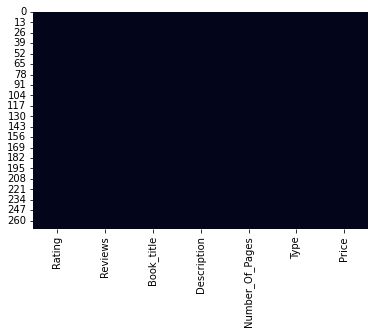

In [44]:
# Check for missing values
# TODO - increase figsize
df.isna().sum()
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df.describe()

,Rating,Number_Of_Pages,Price
count,271.000000,271.000000,271.000000
mean,4.067417,475.077491,54.541860
std,0.290749,306.147492,35.711485
min,3.000000,50.000000,9.323529
25%,3.915000,289.000000,30.751471
50%,4.100000,384.000000,46.317647
75%,4.250000,572.500000,67.854412
max,5.000000,3168.000000,235.650000


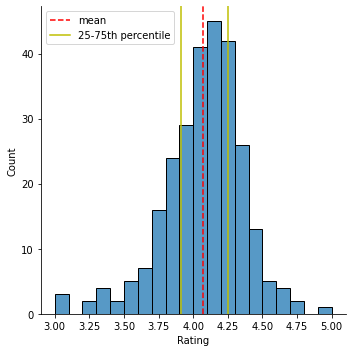

In [19]:
# Plot out distribution of Ratings
sns.displot(df['Rating'])

# Plot the mean
plt.axvline(x=np.mean(df['Rating']), c='r', ls='--', label='mean')

# Plot the 25-75th percentile
plt.axvline(x=np.percentile(df['Rating'], 25), c='y', ls='-', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c='y', ls='-')

plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0149efb090>,
      dtype=object)

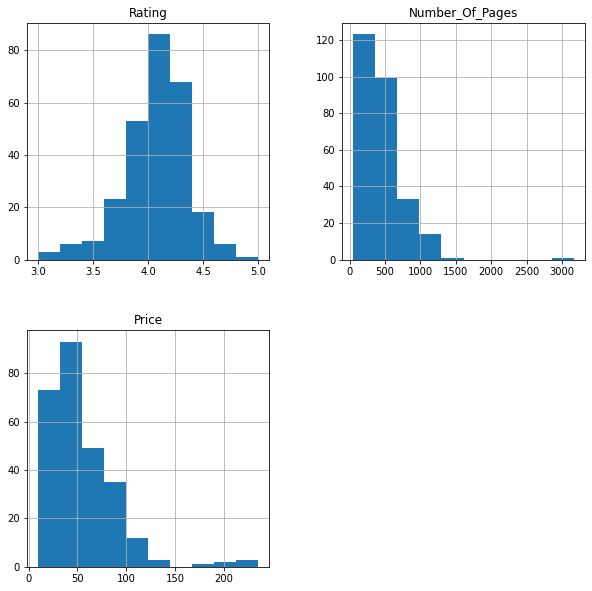

In [23]:
# Plot all other numeric variables and their distributions
df.hist(figsize=(10,10))

In [24]:
# Price and Number_Of_Pages seem highly correlated as they're both skewing right

#### Do book types influence ratings and why?

In [45]:
results = df.groupby('Type').sum()
results

# TODO: Add total sales column at the beginning in order to compare reviews/sales, etc.

,Rating,Number_Of_Pages,Price
Type,,,
Boxed Set - Hardcover,4.49,896,220.385294
Hardcover,385.69,58374,6662.776470
Kindle Edition,40.15,2834,323.855882
Paperback,633.96,63442,7139.952941
Unknown Binding,7.98,498,74.423529
ebook,30.00,2702,359.450000


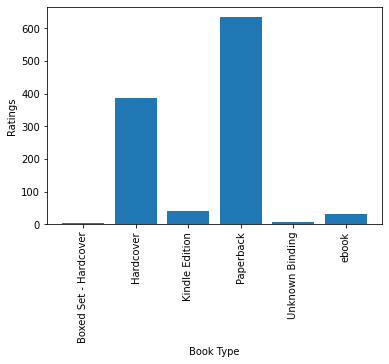

In [41]:
types = [type for type, df in df.groupby('Type')]

plt.bar(types, results['Rating'])

plt.xticks(types, rotation='vertical', size=10)
plt.ylabel('Ratings')
plt.xlabel('Book Type')

plt.show()